# PROJECT BLOCK 2: Advanced Stadistics

### Carlos Eduardo Ortega Clement A01707480


## Part 1 - Advanced topics in multiple regression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

df_data = pd.read_csv('dataus2023.csv')


df_firms = pd.read_csv('firmsus2023.csv')




In [2]:
df_data['qdate'] = pd.PeriodIndex(df_data.q,freq="q")


df_firms1 = df_firms[["empresa","Nombre","status","naics1"]]
df_firms1.columns= ["firm","Nombre","status","industria"]

df_firms1
data = pd.merge(df_data, df_firms1, on="firm", how = "left")

data.set_index(['firm','qdate'],inplace = True)


In [3]:
data['ry'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(4))
data['rq'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(1))

data['f1rq'] = data.groupby(['firm'])['rq'].shift(-1)
data['f4rq'] =  data.groupby(['firm'])['rq'].shift(-4)

data['f1ry'] = data.groupby(['firm'])['ry'].shift(-1)
data['f4ry'] =  data.groupby(['firm'])['ry'].shift(-4)



data['ebit'] = data['revenue'] - data['cogs'] - data['sgae']
data['f1rq'] = data['rq'].shift(-1)
data['opm'] = np.where(data['revenue'] == 0, np.NaN, data['ebit'] / data['revenue'])
data['netincome'] = data['ebit'] + data['otherincome'] + data['extraordinaryitems'] - data['finexp'] - data['incometax']
data['pm'] = np.where(data['revenue'] == 0, np.NaN, data['netincome'] / data['revenue'])
data['ato'] = np.where(data['totalassets'] == 0, np.NaN, data['revenue'] / data['totalassets'])
data['acidratio'] = np.where(data['currentliabilities']==0,np.NaN,data['currentassets'] / data['currentliabilities'])
data['finlev'] = np.where(data['totalassets'] == 0, np.NaN, data['longdebt'] / data['totalassets'])
data['mvalue'] = data['originalprice'] * data['sharesoutstanding']
data['bookvalue'] = data['totalassets'] - data['totalliabilities']
data['r'] = np.log(data.groupby(['firm'])['adjprice'].shift(-1)) - np.log(data.groupby(['firm'])['adjprice'].shift(3))


In [4]:

my_industry = data.loc[(data['fiscalmonth'] == 12) & (data['industria']== 'Industrias manufactureras')&(data['year']==2022)&(data['status']=="activo")]


my_industry.head()

,,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,...,ebit,opm,netincome,pm,ato,acidratio,finlev,mvalue,bookvalue,r
firm,qdate,,,,,,,,,,,,,,,,,,,,,
A,2022Q4,2022q4,12.00,6848000.00,3126000.00,2104000.00,-39000.00,0.00,75000.00,250000.00,10532000.00,...,1618000.00,0.24,1254000.00,0.18,0.65,2.03,0.26,44307180.79,5305000.00,0.05
AA,2022Q4,2022q4,12.00,12451000.00,10212000.00,1549000.00,118000.00,-161000.00,106000.00,664000.00,14756000.00,...,690000.00,0.06,-123000.00,-0.01,0.84,1.75,0.12,8045332.89,6589000.00,-0.74
AAOI,2022Q4,2022q4,12.00,222818.00,189191.00,92625.00,-1205.00,0.00,6193.00,1.00,408263.00,...,-58998.00,-0.26,-66397.00,-0.30,0.55,1.32,0.21,53909.83,184670.00,-0.50
AAON,2022Q4,2022q4,12.00,888788.00,651216.00,110811.00,399.00,0.00,2627.00,24157.00,813903.00,...,126761.00,0.14,100376.00,0.11,1.09,2.40,0.09,4006989.13,560714.00,0.56
AAPL,2022Q3,2022q3,12.00,394328000.00,223546000.00,51345000.00,-334000.00,0.00,0.00,19300000.00,352755000.00,...,119437000.00,0.30,99803000.00,0.25,1.12,0.88,0.28,2220977926.40,50672000.00,-0.31


In [5]:
my_industry['log_totalassets'] = np.where(my_industry['totalassets']==0,np.NaN,np.log(my_industry['totalassets']))
my_industry['log_revenue'] = np.where(my_industry['revenue']==0,np.NaN,np.log(my_industry['revenue']))
my_industry['log_netincome'] = np.where(my_industry['netincome']==0,np.NaN,np.log(my_industry['netincome']))
my_industry['log_mvalue'] = np.where(my_industry['mvalue']==0,np.NaN,np.log(my_industry['mvalue']))

C:\Users\Litos\AppData\Local\Temp\ipykernel_17828\2033350681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_industry['log_totalassets'] = np.where(my_industry['totalassets']==0,np.NaN,np.log(my_industry['totalassets']))
C:\Users\Litos\miniconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Litos\miniconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Litos\AppData\Local\Temp\ipykernel_17828\2033350681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

## 1.1 Descriptive Statistics

### For the Descriptive Statistics of your industry using only the most recent fiscal year observations (fiscalmonth=12, year=2022), do the following modifications:

### For the ratios, instead of calculating the arithmetic mean of the ratios, calculate the weighted average of the ratios. To calculate the weighted average of a ratio, you have to divide the sum of the numerator variable by the sum of the denominator variable. For example, to calculate the weighted average of profit margin you first sum all the net income of all firms and then divide it by the sum of revenue of all firms.

In [6]:
# Calcular la media ponderada para 'pm'
w_pm = np.sum(my_industry['netincome']) / np.sum(my_industry['revenue'])
# Calcular la media ponderada para 'ato'
w_ato = np.sum(my_industry['revenue']) / np.sum(my_industry['totalassets'])
# Calcular la media ponderada para 'acidratio'
w_acidratio = np.sum(my_industry['currentassets']) / np.sum(my_industry['currentliabilities'])
# Calcular la media ponderada para 'finlev'
w_finlev = np.sum(my_industry['longdebt']) / np.sum(data['totalassets'])




In [7]:
print("weighted mean pm : ",w_pm)
print("weighted mean ato: ",w_ato)
print("weighted mean acidratio: ",w_acidratio)
print("weighted mean finlev: ",w_finlev)
my_industry[['pm','ato','acidratio','finlev']].describe()

weighted mean pm :  0.10628330143437634
weighted mean ato:  0.7396824924693044
weighted mean acidratio:  1.4517556119961494
weighted mean finlev:  0.0006761343893864698


,pm,ato,acidratio,finlev
count,1252.00,1472.00,1469.00,1472.00
mean,-18.12,0.61,5.03,0.21
std,154.86,0.66,6.39,0.24
min,-3857.75,-0.01,0.02,0.00
25%,-0.91,0.08,1.72,0.03
50%,0.01,0.54,2.73,0.15
75%,0.09,0.91,5.66,0.31
max,128.40,13.56,67.02,2.76


### Compare this weighted average with the arithmetic mean and the median. Which is the best measure for central tendency of the ratios? Interpret the weighted average of profit margin and asset turn over of your industry.

AL ANALIZAR LOS DIFERENTES VALORES DE TENDENCIA CENTRAL DE LOS RATIO, SE PUEDE OBSERVAR QUE LA MEDIA ARITMÉTICA DIFERENCIA MUCHO DE LA MEDIANA Y ESTO ES POR LA CANTIDAD DE VALORES EXTREMOS. POR OTRO LADO, LA MEDIA PONDERADA TIENE VALORES MÁS PARECIDOS A LA MEDIANA, SIN EMBARGO, DIFEREN UN POCO. YO CONSIDERO QUE LA MEDIA PONDERADA ES MEJOR PARA ESTE CASO YA QUE SE TRATAN DE UNA PROPORCIÓN Y LE DA UN PESO DISTINTO A CADA EMPRESA DEPENDIENDO DE SUS INGRESOS O ACTIVOS.

AL ANALIZAR LA VARIABLE PM, ME DIO UN VALOR DE 0.106 EN LA MEDIA PONDERADA Y DIFERENCIA BASTANTE DE LA MEDIA ARITMÉTICA CON UN VALOR DE -18.92. PERO, LA MEDIANA DA 0.01. SE PUEDE OBSERVAR UNA DIFERENCIA NOTORIA USANDO LA MEDIA PONDERADA EN ESTE CASO.

AL ANALIZAR LA VARIABLE ATO, DIÓ UN VALOR DE 0.73 PARA LA MEDIA PONDERADA Y UN VALOR DE 0.61 PARA LA MEDIA ARITMÉTICA, NO DIFIERE MUCHO TAMPOCO CON RESPECTO A LA MEDIANA YA QUE DA UN VALOR DE 0.54.


# 1.2 Multiple Regression - advanced topics

## 1.2.1 Calculation of variables

### For the complete historical dataset of annual fiscal years (fiscalmonth=12 for all quarter-years), you have to calculate the following new independent variables:



In [8]:

my_industry_allq = data.loc[(data['fiscalmonth'] == 12) & (data['industria']== 'Industrias manufactureras')&(data['status']=="activo")]

my_industry_allq['log_mvalue'] = np.where(my_industry_allq['mvalue']==0,np.NaN,np.log(my_industry_allq['mvalue']))
my_industry_allq['log_totalassets'] = np.where(my_industry_allq['totalassets']==0,np.NaN,np.log(my_industry_allq['totalassets']))
my_industry_allq['log_revenue'] = np.where(my_industry_allq['revenue']==0,np.NaN,np.log(my_industry_allq['revenue']))
my_industry_allq['log_netincome'] = np.where(my_industry_allq['netincome']==0,np.NaN,np.log(my_industry_allq['netincome']))

C:\Users\Litos\AppData\Local\Temp\ipykernel_17828\2188719901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_industry_allq['log_mvalue'] = np.where(my_industry_allq['mvalue']==0,np.NaN,np.log(my_industry_allq['mvalue']))
C:\Users\Litos\miniconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Litos\AppData\Local\Temp\ipykernel_17828\2188719901.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

### Firm size as a categorical variable. For each quarter, you have to label firms in 3 equal groups: small, medium, big according to the market value of the firms.



In [9]:
dumms = my_industry_allq.copy()

dumms['size'] = dumms[['log_mvalue']].transform(lambda x: pd.qcut(x,3,labels = ["small","medium","large"]))

dumms = dumms.replace({'small': 1,'medium':2,'large': 3})

#dumms = dumms.dropna()

dumms

q  fiscalmonth     revenue       cogs       sgae  \
firm qdate                                                           
A    2000Q4  2000q4        12.00 10773000.00 5522000.00 4198000.00   
     2001Q4  2001q4        12.00  8396000.00 5166000.00 4008000.00   
     2002Q4  2002q4        12.00  6010000.00 3694000.00 3923000.00   
     2003Q4  2003q4        12.00  6056000.00 3762000.00 3019000.00   
     2004Q4  2004q4        12.00  7181000.00 4058000.00 2737000.00   
...             ...          ...         ...        ...        ...   
ZYNE 2018Q4  2018q4        12.00       86.00       0.00   40483.83   
     2019Q4  2019q4        12.00        0.00       0.00   34319.81   
     2020Q4  2020q4        12.00        0.00       0.00   52062.54   
     2021Q4  2021q4        12.00        0.00       0.00   36770.39   
     2022Q4  2022q4        12.00        0.00       0.00   35251.54   

             otherincome  extraordinaryitems   finexp  incometax  totalassets  \
firm qdate                                                                      
A    2000Q4    111000.00                0.00     0.00  407000.00   8425000.00   
     2001Q4    301000.00           580000.00     0.00  -71000.00   7986000.00   
     2002Q4     60000.00           -10000.00     0.00 -525000.00   8203000.00   
     2003Q4     35000.00          -268000.00     0.00 1100000.00   6297000.00   
     2004Q4     54000.00                0.00     0.00   91000.00   7056000.00   
...                  ...                 ...      ...        ...          ...   
ZYNE 2018Q4      -474.67                0.00  -961.32       0.00     67327.44   
     2019Q4      -145.91                0.00 -1522.14       0.00     87764.60   
     2020Q4       481.72                0.00  -243.99       0.00     74056.78   
     2021Q4      -559.68                0.00   -21.05       0.00     81171.51   
     2022Q4      -631.13                0.00  -846.86       0.00     55520.89   

             ...  acidratio  finlev      mvalue  bookvalue     r  log_mvalue  \
firm qdate   ...                                                               
A    2000Q4  ...       2.05    0.00 24986059.36 5265000.00 -1.22       17.03   
     2001Q4  ...       2.40    0.00 13219949.12 5659000.00  0.13       16.40   
     2002Q4  ...       2.24    0.14  8387758.60 4627000.00 -0.98       15.94   
     2003Q4  ...       2.04    0.18 13922599.19 2824000.00  0.88       16.45   
     2004Q4  ...       2.45    0.16 11732870.20 3569000.00 -0.35       16.28   
...          ...        ...     ...         ...        ...   ...         ...   
ZYNE 2018Q4  ...       6.88    0.00    52351.81   57601.66 -0.47       10.87   
     2019Q4  ...       7.22    0.00   140115.98   75596.74 -0.35       11.85   
     2020Q4  ...       5.27    0.00    97149.28   60143.53  0.19       11.48   
     2021Q4  ...       8.10    0.00   118706.51   70913.33 -0.82       11.68   
     2022Q4  ...       5.97    0.00    24943.24   46228.76 -1.56       10.12   

             log_totalassets  log_revenue  log_netincome  size  
firm qdate                                                      
A    2000Q4            15.95        16.19          13.54     3  
     2001Q4            15.89        15.94          12.07     3  
     2002Q4            15.92        15.61            NaN     3  
     2003Q4            15.66        15.62            NaN     3  
     2004Q4            15.77        15.79          12.76     3  
...                      ...          ...            ...   ...  
ZYNE 2018Q4            11.12         4.45            NaN     1  
     2019Q4            11.38          NaN            NaN     1  
     2020Q4            11.21          NaN            NaN     1  
     2021Q4            11.30          NaN            NaN     1  
     2022Q4            10.92          NaN            NaN     1  

[16485 rows x 45 columns]

### Calculate the corresponding dummy (binary) variables for the firm size following the dummy encoding method.

In [10]:
                                                                            

dumms = pd.get_dummies(dumms,columns=['size'])


dumms = dumms.replace({True: 1, False: 0})
 

dumms

q  fiscalmonth     revenue       cogs       sgae  \
firm qdate                                                           
A    2000Q4  2000q4        12.00 10773000.00 5522000.00 4198000.00   
     2001Q4  2001q4        12.00  8396000.00 5166000.00 4008000.00   
     2002Q4  2002q4        12.00  6010000.00 3694000.00 3923000.00   
     2003Q4  2003q4        12.00  6056000.00 3762000.00 3019000.00   
     2004Q4  2004q4        12.00  7181000.00 4058000.00 2737000.00   
...             ...          ...         ...        ...        ...   
ZYNE 2018Q4  2018q4        12.00       86.00       0.00   40483.83   
     2019Q4  2019q4        12.00        0.00       0.00   34319.81   
     2020Q4  2020q4        12.00        0.00       0.00   52062.54   
     2021Q4  2021q4        12.00        0.00       0.00   36770.39   
     2022Q4  2022q4        12.00        0.00       0.00   35251.54   

             otherincome  extraordinaryitems   finexp  incometax  totalassets  \
firm qdate                                                                      
A    2000Q4    111000.00                0.00     0.00  407000.00   8425000.00   
     2001Q4    301000.00           580000.00     0.00  -71000.00   7986000.00   
     2002Q4     60000.00           -10000.00     0.00 -525000.00   8203000.00   
     2003Q4     35000.00          -268000.00     0.00 1100000.00   6297000.00   
     2004Q4     54000.00                0.00     0.00   91000.00   7056000.00   
...                  ...                 ...      ...        ...          ...   
ZYNE 2018Q4      -474.67                0.00  -961.32       0.00     67327.44   
     2019Q4      -145.91                0.00 -1522.14       0.00     87764.60   
     2020Q4       481.72                0.00  -243.99       0.00     74056.78   
     2021Q4      -559.68                0.00   -21.05       0.00     81171.51   
     2022Q4      -631.13                0.00  -846.86       0.00     55520.89   

             ...      mvalue  bookvalue     r  log_mvalue  log_totalassets  \
firm qdate   ...                                                             
A    2000Q4  ... 24986059.36 5265000.00 -1.22       17.03            15.95   
     2001Q4  ... 13219949.12 5659000.00  0.13       16.40            15.89   
     2002Q4  ...  8387758.60 4627000.00 -0.98       15.94            15.92   
     2003Q4  ... 13922599.19 2824000.00  0.88       16.45            15.66   
     2004Q4  ... 11732870.20 3569000.00 -0.35       16.28            15.77   
...          ...         ...        ...   ...         ...              ...   
ZYNE 2018Q4  ...    52351.81   57601.66 -0.47       10.87            11.12   
     2019Q4  ...   140115.98   75596.74 -0.35       11.85            11.38   
     2020Q4  ...    97149.28   60143.53  0.19       11.48            11.21   
     2021Q4  ...   118706.51   70913.33 -0.82       11.68            11.30   
     2022Q4  ...    24943.24   46228.76 -1.56       10.12            10.92   

             log_revenue  log_netincome  size_1  size_2  size_3  
firm qdate                                                       
A    2000Q4        16.19          13.54       0       0       1  
     2001Q4        15.94          12.07       0       0       1  
     2002Q4        15.61            NaN       0       0       1  
     2003Q4        15.62            NaN       0       0       1  
     2004Q4        15.79          12.76       0       0       1  
...                  ...            ...     ...     ...     ...  
ZYNE 2018Q4         4.45            NaN       1       0       0  
     2019Q4          NaN            NaN       1       0       0  
     2020Q4          NaN            NaN       1       0       0  
     2021Q4          NaN            NaN       1       0       0  
     2022Q4          NaN            NaN       1       0       0  

[16485 rows x 47 columns]

#### Calculate operating earnings per share deflated by stock price: oepsp = (ebit / sharesoutstanding) / originalprice

In [11]:
# Calcular Operating Earnings Per Share Deflated by Stock Price (OEPSP)
dumms['oepsp'] = (dumms['ebit'] / dumms['sharesoutstanding']) / dumms['originalprice']

#### Calculate earnings per share deflated by stock price: epsp = (netincome / sharesoutstanding) / originalprice

In [12]:
# Calcular Earnings Per Share Deflated by Stock Price (EPSP)
dumms['epsp'] = (dumms['netincome'] / dumms['sharesoutstanding']) / dumms['originalprice']



#### Calculate book-to-market ratio: bmr = bookvalue / marketvalue

In [13]:
# Calcular Book-to-Market Ratio (BMR)
dumms['bmr'] = dumms['bookvalue'] / dumms['log_mvalue']


###  In this model, the variable you have to use as dependent variable will be annual stock returns (instead of quarterly returns) one quarter in the future (f1.ry).


### Resultado del primer modelo :  

In [14]:
x=dumms[['finlev','oepsp','epsp','ato','opm','bmr','size_2','size_3']]
y =dumms['f1ry']
  

import statsmodels.api as sm
X = sm.add_constant(x)
model = sm.OLS(y, X, missing='drop').fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     403.3
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:38:52   Log-Likelihood:                -11780.
No. Observations:               14295   AIC:                         2.358e+04
Df Residuals:                   14286   BIC:                         2.365e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1108      0.009    -11.720      0.0

## 1.2.2 Winsorization of variables

### You have to check for very extreme values for the following ratios: profit margin, asset turn over, oepsp, bmr. Apply winsorization in case of very extreme values (keep at lest 98% of original values for each winsorization). Use the histogram to decide the level of winsorization.

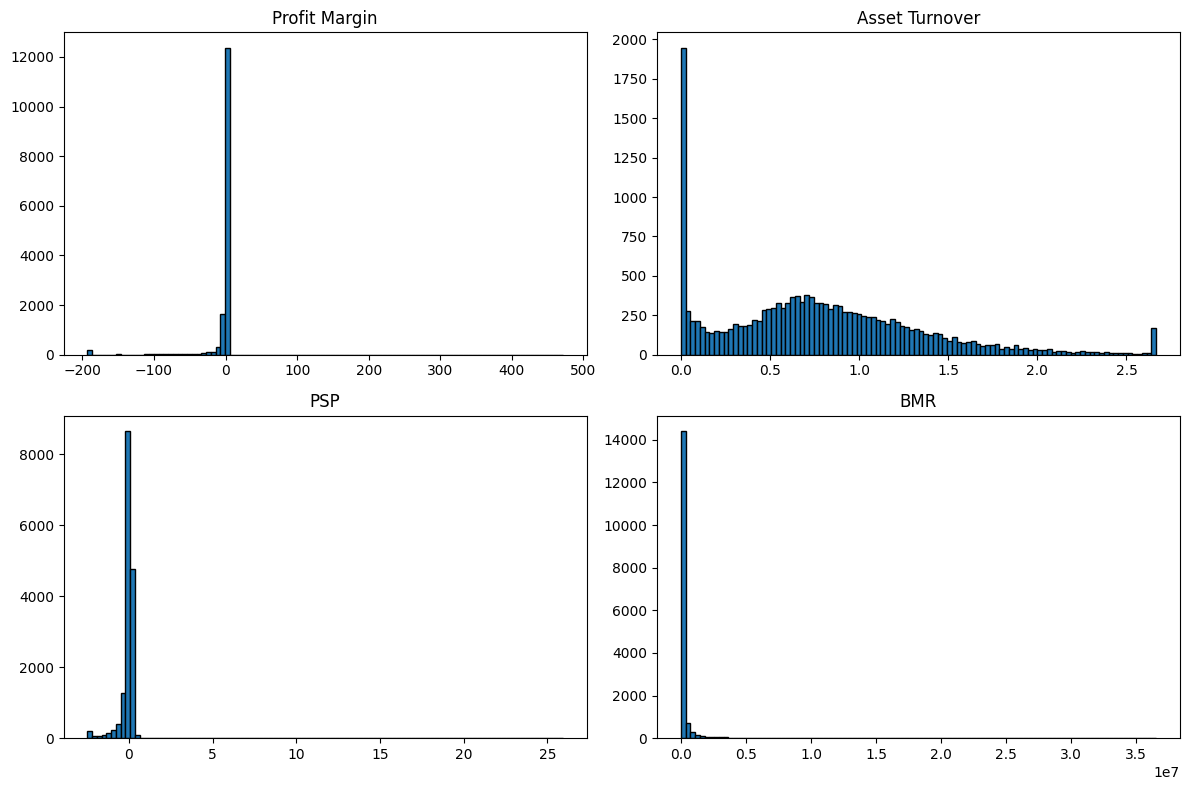

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize


# Crear una copia explícita del DataFrame
dumms_copy = dumms.copy()

# Aplicar Winsorization a cada ratio utilizando la función winsorize
dumms_copy['pm'] = winsorize(dumms_copy['pm'],limits=(0.01,0.01))
dumms_copy['ato'] = winsorize(dumms_copy['ato'],limits=(0.01,0.01))
dumms_copy['oepsp'] = winsorize(dumms_copy['oepsp'],limits=(0.01,0.01))
dumms_copy['bmr'] = winsorize(dumms_copy['bmr'],limits=(0.01,0.01))
dumms_copy['epsp'] = winsorize(dumms_copy['epsp'],limits=(0.01,0.01))

# Visualizar los histogramas para decidir el nivel de Winsorization en la copia del DataFrame
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(dumms_copy['pm'], bins=100, edgecolor='black')
plt.title('Profit Margin')

plt.subplot(2, 2, 2)
plt.hist(dumms_copy['ato'], bins=100, edgecolor='black')
plt.title('Asset Turnover')

plt.subplot(2, 2, 3)
plt.hist(dumms_copy['oepsp'], bins=100, edgecolor='black')
plt.title('PSP')

plt.subplot(2, 2, 4)
plt.hist(dumms_copy['bmr'], bins=100, edgecolor='black')
plt.title('BMR')

plt.tight_layout()
plt.show()

PODEMOS OBSERVAR CON LOS HISTOGRAMAS QUE DESPUÉS DE HACER LA WINSORIZATION NO EXISTEN VALORES MUY EXTREMOS. SE PUEDE DECIR  QUE SI EXISTE UN PICO ALTO EN ALGUNOS VALORES PERO ESTO NO ES UN INDICADOR DE QUE SE TENGAN VALORES MUY EXTREMOS. TAMBIÉN PODEMOS VER SE CONSERVÓ EL 98 % DE LOS DATOS YA QUE SOLAMENTE APLICAMOS LA TÉCNICA CON LÍMITES DEL 0.01%, ELIMINANDO EL 0.005% INFERIOR Y SUPERIOR DE LOS DATOS.

In [16]:
x=dumms_copy[['finlev','pm','oepsp','epsp','ato','bmr','size_2','size_3']]
y =dumms_copy['f1ry']
  
    
import statsmodels.api as sm
X = sm.add_constant(x)
model = sm.OLS(y, X, missing='drop').fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     476.1
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:38:59   Log-Likelihood:                -11546.
No. Observations:               14295   AIC:                         2.311e+04
Df Residuals:                   14286   BIC:                         2.318e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0743      0.013     -5.795      0.0

SE PUEDE OBSERVAR UNA MEJORA EN EL DESEMPEñO DEL MODELO AL APLICAR UNA WINSORIZATION. DE PASAR A UN R-SQUARED DE 0.187 PASAMOS A UNO DE 0.212, MAS ADELANTE SE ANALIZARA EL MODELO DE MANERA MAS DETALLADA CON TODO Y SUS COEFICIENTES.

## 1.2.3 Multicollienarity


### Interpret the test. If there is a multicollienarity problem, propose how to solve it.

In [17]:

dumms_clean = dumms_copy.copy()


### Do the multicollienarity test considering all numeric independent variables:

#### profit margin, asset turn over, epsp, oepsp, bmr


In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant



# Crear una copia de las variables independientes
independent_vars = dumms_clean[['finlev','opm','bmr','ato', 'epsp','oepsp','pm','size_2','size_3']]

median_values = independent_vars.median()

# Rellena los valores NaN con las medianas correspondientes
independent_vars = independent_vars.fillna(median_values)


# Agregar una constante para calcular el VIF
independent_vars_with_const = add_constant(independent_vars)



# Calcular el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data['Variable'] = independent_vars_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(independent_vars_with_const.values, i) for i in range(independent_vars_with_const.shape[1])]

vif_data


,Variable,VIF
0,const,5.76
1,finlev,1.00
2,opm,1.19
3,bmr,1.12
4,ato,1.14
5,epsp,4.03
6,oepsp,3.94
7,pm,1.29
8,size_2,1.46
9,size_3,1.63


SEGÚN LAS CONSTANTES VIF PUEDO NOTAR QUE TODAS LAS VARIABLES NO PRESENTAN MULTICOLINEARIDAD YA QUE TODAS LAS CONSTANTES DAN VALORES MENORES A 5. SIN EMBARGO, ESTA ES UNA PRUEBA LINEAL Y NO ES SUFICIENTE PARA DESCARTAR LA MULTICOLINEARIDAD. PARA ESO, VOY A HACER OTRA PRUEBA QUE ME PERMITA VER MÁS A PROFUNDIDAD SI EXISTE MULTICOLINEALIDAD.

PARA ESTO UTILICÉ EL NÚMERO DE CONDICIÓN EL CUAL PROPORCIONA INFORMACIÓN SOBRE LA ESTABILIDAD NUMÉRICA DEL MODELO.
UN NÚMERO DE CONDICIÓN MAYOR A 30 SE CONSIDERA INDICTIVO DE MULTICOLINEALIDAD

In [19]:
import numpy as np
from numpy.linalg import cond

# Crear una copia de las variables independientes
independent_vars = dumms_clean[['bmr','pm','finlev','ato', 'epsp','oepsp','size_2','size_3']]
median_values = independent_vars.median()

# Rellena los valores NaN con las medianas correspondientes
independent_vars = independent_vars.fillna(median_values)


# Agregar una constante para calcular el VIF
independent_vars_with_const = add_constant(independent_vars)


X = independent_vars_with_const.values
cond_number = cond(X)

cond_number

4311113.108855084

SE PUEDE OBSERVAR QUE AL UTILIZAR TODAS LAS VARIABLES EXISTE UN NÚMERO MUY GRANDE DE 14,168,513. ESTO INDICA QUE EXISTE MULTICOLINEALIDAD. POR LO QUE REDUCIRÉ LAS VARIABLES PARA VER SI LA CONSTANTE DA MENOR A 30. QUITARÉ LAS VARIABLES CON MÁS CORRELACIÓN LAS CUALES SON BMR Y PM.

In [134]:
import numpy as np
from numpy.linalg import cond

# Crear una copia de las variables independientes
independent_vars = dumms_clean[['ato', 'epsp','oepsp','size_2','size_3']]

median_values = independent_vars.median()

# Rellena los valores NaN con las medianas correspondientes
independent_vars = independent_vars.fillna(median_values)


# Agregar una constante para calcular el VIF
independent_vars_with_const = add_constant(independent_vars)


X = independent_vars_with_const.values
cond_number = cond(X)

cond_number

9.145067575255094

 SE PUEDE OBSERVAR QUE YA NO EXISTEN PROBLEMAS DE MULTICOLINEALIDAD AL QUITAR LAS VARIABLES PM Y BMR. ESTO ES DEBIDO A QUE EL NÚMERO DE CONDICIÓN ES MENOR A 30.


## 1.2.4 Multiple Regression Model

### Run a first multiple regression model to examine whether the financial ratios and firm size explain/predict future annual stock returns (one quarter later). For the ratios, use the winsorized version (if the ratio has extreme values)

In [135]:


x=dumms_copy[['epsp','ato','oepsp','size_2','size_3']]
y =dumms_copy['f1ry']
  

#,'bmr','epsp' ,'bookvalue'
import statsmodels.api as sm
X = sm.add_constant(x)
model = sm.OLS(y, X, missing='drop').fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     936.3
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:06:35   Log-Likelihood:                -13213.
No. Observations:               15314   AIC:                         2.644e+04
Df Residuals:                   15308   BIC:                         2.648e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0907      0.011     -7.918      0.0

### Interpret the results of each coefficient (beta and their statistical significance). Remember that the coefficients of categorical dummies have a special interpretation.

En este modelo estamos buscando predecir los retornos trimestrales de las acciones y tener un analisis del rendimiento de dichos retornos ya sea saber si son positivos o negativos para poder entender si los ingresos están creciendo o no.

Procederé a hacer un análisis de las características de los coeficientes obtenidos del modelo.

Lo primero que se puede notar es que todos los coeficientes tienen un valor de t absoluto mayor a 2, indicando que los coeficientes son significativamente diferente de 0. En cuanto a todas las variables, tenemos un valor de p menor a 0.05. Esto indica que tenemos mas del 95% de confianza de no tener un error al rechazar la hipótesis nula.

Analizando el epsp podemos notar que tiene una relación positiva con los retornos trimestrales de un un año para adelante. Cuando el epsp crece una unidad, la variable dependiente o los retornos crecen en 0.59.

Analizando el oepsp podemos decir lo mismo, tiene una relació positiva con los retornos trimestrales al año. Cuando esta crece una unidad, la variable dependiente o los retornos crecen en- 0.0916

Analizando el ato podemos decir lo mismo.  Cuando crece una unidad, la variable dependiente o los retornos crecen en 0.039 unidades.


Para los coeficiente dummy Size_2, que representa empresas medianas y el Size_3 que representa empresas grandes, este es el siguiente análisis: 

Estas variables representan el cambio promedio de los retornos o rendimientos trimestrales de las acciones al año en adelante con respecto a las empresas de tamaño pequeño. 

Esto quiere decir que en promedio  y en comparación de las empresas pequeñas,en las empresas medianas los retornos o la variable dependiente crece en 0.1033 unidades y  para las empresas grandes los retornos crecen en 0.14 unidades.

Analizando la r cuadrada podemos ver que tiene un valor de 0.234, es decir, que la precisión del modelo para explicar la variabilidad en f1ry es del 23.4% . Esto es un valor bajo para poder confiar en el modelo creado y realizar predicciones. Por eso mismo se intentará mejorar el modelo agregando términos de interacción y eliminando outliers

### Add interaction terms between firm size and earnings per share deflated by price (epsp or oepsp, in case you eliminated one due to multicollienarity). Re-run the regression and INTERPRET the interaction between these two variables. Also, state the regression equation for each size group.

In [136]:
import statsmodels.api as sm

# Crear términos de interacción
dumms_copy['size_2*epsp'] = dumms_copy['size_2'] * dumms_copy['epsp']
dumms_copy['size_2*oepsp'] = dumms_copy['size_2'] * dumms_copy['oepsp']
dumms_copy['size_3*epsp'] = dumms_copy['size_3'] * dumms_copy['epsp']
dumms_copy['size_3*oepsp'] = dumms_copy['size_3'] * dumms_copy['oepsp']

# Definir nuevas variables independientes y constante
x_interactions = dumms_copy[['epsp', 'ato', 'oepsp', 'size_2', 'size_3', 'size_2*epsp', 'size_2*oepsp', 'size_3*epsp', 'size_3*oepsp']]
X_interactions = sm.add_constant(x_interactions)

# Ajustar el modelo de regresión con términos de interacción
model_interactions = sm.OLS(y, X_interactions, missing='drop').fit()

# Mostrar resumen del modelo con términos de interacción
print(model_interactions.summary())


                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     528.4
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:30:49   Log-Likelihood:                -13184.
No. Observations:               15314   AIC:                         2.639e+04
Df Residuals:                   15304   BIC:                         2.646e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0968      0.012     -8.414   

### Interpret the R-squared of the model



Después de agregar los términos de interacción entre los tamaños y las variables epsp y oepsp podemos observar una ligera mejora en el coeficiente de la R cuadrada, dándonos un valor de 23./%.

Los términos de interacción nos indican el impacto que tiene la variable dependiente ( los retornos) con respecto a las variables independientes ( epsp y oepsp).

Para las empresas medianas, el epsp tiene un impacto positivo de 0.24 en la variable dependiente. En cambio, la variable oepsp tiene un impacto negativo de 0.44  en la variable dependiente.
Debido a que las dos tienen un valor de t absoluta mayor a 2 y un a p menor a 0.05, podemos confiar en ellas a mas del 95%.

Para las empresas grandes, el epsp tiene un impacto marginalmente positivo de 0.25 en la variable dependiente ya que tiene un valor de t absoluto menor a 2 pero no por mucho y el valor de p es mayor a 0.05 pero no por mucho tampoco. El valor de oepsp tiene un impacto negativo de 0.74 en la variable dependiente ya que tiene un valor de t absoluto mayor a 2 y un valor de p menor a 0.05, por lo que podemos confiar en estas en más del 95%.

### Run a multiple regression but now using only the last complete year of data (yearf=2022)

In [137]:
dumms_2022 = dumms_copy.copy()

dumms_2022 = dumms_2022.loc[(dumms_copy['yearf'] == 2022)]

dumms_2022



,,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,...,size_1,size_2,size_3,oepsp,epsp,bmr,size_2*epsp,size_2*oepsp,size_3*epsp,size_3*oepsp
firm,qdate,,,,,,,,,,,,,,,,,,,,,
A,2022Q4,2022q4,12.00,6848000.00,3126000.00,2104000.00,-39000.00,0.00,75000.00,250000.00,10532000.00,...,0,0,1,0.04,0.03,301306.48,0.00,0.00,0.03,0.04
AA,2022Q4,2022q4,12.00,12451000.00,10212000.00,1549000.00,118000.00,-161000.00,106000.00,664000.00,14756000.00,...,0,0,1,0.09,-0.02,414386.81,-0.00,0.00,-0.02,0.09
AAOI,2022Q4,2022q4,12.00,222818.00,189191.00,92625.00,-1205.00,0.00,6193.00,1.00,408263.00,...,1,0,0,-1.09,-1.23,16949.87,-0.00,-0.00,-0.00,-0.00
AAON,2022Q4,2022q4,12.00,888788.00,651216.00,110811.00,399.00,0.00,2627.00,24157.00,813903.00,...,0,0,1,0.03,0.03,36880.46,0.00,0.00,0.03,0.03
AAPL,2022Q3,2022q3,12.00,394328000.00,223546000.00,51345000.00,-334000.00,0.00,0.00,19300000.00,352755000.00,...,0,0,1,0.05,0.04,2354514.08,0.00,0.00,0.04,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNTL,2022Q4,2022q4,12.00,0.00,0.00,227287.00,0.00,-15975.00,-5987.00,-469.00,539310.00,...,0,1,0,-0.20,-0.21,31102.28,-0.21,-0.20,-0.00,-0.00
ZTS,2022Q4,2022q4,12.00,8080000.00,2454000.00,2709000.00,-40000.00,3000.00,221000.00,545000.00,14925000.00,...,0,0,1,0.04,0.03,244076.01,0.00,0.00,0.03,0.04
ZVIA,2022Q4,2022q4,12.00,163181.00,93160.00,117889.00,286.00,13790.00,0.00,65.00,98932.00,...,1,0,0,-0.17,-0.12,6517.54,-0.00,-0.00,-0.00,-0.00


In [140]:
import statsmodels.api as sm

y =dumms_2022['f1ry']

# Definir nuevas variables independientes y constante
x_interactions = dumms_2022[['epsp', 'ato', 'oepsp', 'size_2', 'size_3']]
X_interactions = sm.add_constant(x_interactions)

# Ajustar el modelo de regresión con términos de interacción
model_interactions = sm.OLS(y, X_interactions, missing='drop').fit()

# Mostrar resumen del modelo con términos de interacción
print(model_interactions.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     245.8
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          1.62e-189
Time:                        21:36:05   Log-Likelihood:                -1272.0
No. Observations:                1431   AIC:                             2556.
Df Residuals:                    1425   BIC:                             2588.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2323      0.038     -6.049      0.0

### What differences do you see compared with the previous model? Explain


La principal diferencia que se puede notar es en el valor de la r cuadrada ya que aumento de 23.7% a un 46.3%, esto indica una gran diferencia al usar los datos del año 2022 solamente. Sin embargo, lo que noté es que en algunos de los coeficientes se redujo el nivel de confianza para rechazar la hipótesis nula. Por ejemplo, epsp en el modelo anterior tiene un valor de p de 0 o muy cercano a 0, en cambio en este modelo cambió a un valor de 0.88, teniendo un valor de confianza del 12%, lo cual es muy bajo para este coeficiente. Sin embargo, se notó una mejora en el coeficiente de r cuadrada.

# 1.2.5 Regression Diagnosis

## Do a diagnosis for possible outliers and influential observations, but using only annual data for 2022. You will end up with a cross-sectional sample with the most recent financial information.

### - Using matrix algebra calculate the beta coefficients of the same regression model

In [141]:
RD_2022 = dumms_2022.copy()


# PRIMERO ELIMINAMOS LOS VALORES NAN PARA LA MULTIPLICACION MATRICIAL, ESTO PARA EVITAR MAS VALORES NULOS.
RD_2022 = RD_2022.dropna(subset = ['f1ry','epsp', 'ato', 'oepsp', 'size_2', 'size_3'])




In [144]:
x = RD_2022[['epsp', 'ato', 'oepsp', 'size_2', 'size_3']]

# Agregar una constante a las variables independientes
X = sm.add_constant(x)

# Variable dependiente
y = RD_2022['f1ry']

# Calcular los coeficientes beta usando álgebra matricial
beta = np.linalg.inv(X.T @ X) @ X.T @ y

print("Coeficientes Beta:")
print(beta)

Coeficientes Beta:
0   -0.23
1    0.01
2   -0.03
3    0.72
4    0.08
5    0.17
dtype: float64


### - Using matrix algebra calculate the standard errors of the beta coefficients (optional)



In [145]:
# Ajustar el modelo de regresión con términos de interacción
model = sm.OLS(y, X, missing='drop').fit()

# Obtener los errores estándar de los coeficientes
se = model.bse

print("Errores Estándar de los Coeficientes:")
print(se)

Errores Estándar de los Coeficientes:
const    0.04
epsp     0.08
ato      0.03
oepsp    0.08
size_2   0.04
size_3   0.04
dtype: float64


### - Using matrix algebra calculate the R-squared and the adjusted R-squared of the model (optional)

In [146]:
# Calcular los valores ajustados
y_hat = X.to_numpy() @ beta

# Calcular la suma de los cuadrados de las residuales (SSR)
ssr = np.sum((y - y_hat)**2)

# Calcular la suma total de los cuadrados (SST)
sst = np.sum((y - np.mean(y))**2)

# Calcular el R-cuadrado
r_squared = 1 - (ssr / sst)

print("R-cuadrado con álgebra matricial:", r_squared)


R-cuadrado con álgebra matricial: 0.4630920826934205


### - Using matrix algebra calculate the Hat Matrix



In [147]:
# Calcular la matriz Hat

x = X.to_numpy()
hat_matrix = x @ np.linalg.inv(x.T @ x) @ x.T

print("Matriz Hat:")
print(hat_matrix)


Matriz Hat:
[[ 2.49922149e-03  2.43790372e-03 -4.21418883e-05 ... -2.92315476e-04
   2.55382059e-03  1.12148239e-04]
 [ 2.43790372e-03  2.59563766e-03  2.17556520e-04 ...  9.65943218e-05
   2.41238859e-03 -5.97043006e-05]
 [-4.21418883e-05  2.17556520e-04  2.24775751e-03 ...  1.38591357e-03
  -9.52175924e-05  1.95755255e-03]
 ...
 [-2.92315476e-04  9.65943218e-05  1.38591357e-03 ...  5.08582492e-03
  -8.62313030e-04  2.34983028e-05]
 [ 2.55382059e-03  2.41238859e-03 -9.52175924e-05 ... -8.62313030e-04
   2.72207109e-03  2.82631350e-04]
 [ 1.12148239e-04 -5.97043006e-05  1.95755255e-03 ...  2.34983028e-05
   2.82631350e-04  2.67783111e-03]]


### With the hat matrix identify possible leverage observations. EXPLAIN why these observations can be leverage points.

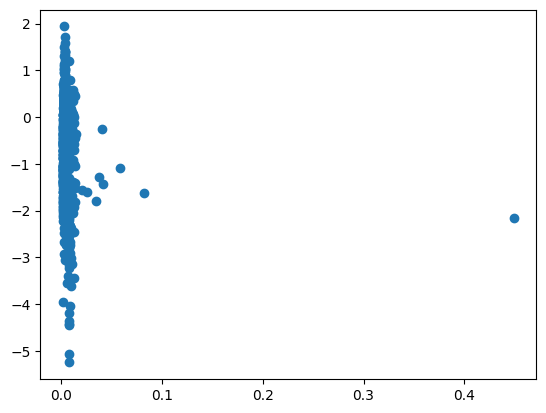

In [169]:

# Get diagonal of hat matrix (leverage)
leverage = np.diag(hat_matrix)

# Plot the leverage values
plt.scatter(leverage, y);


AL HACER UN PLOT DE LA HAT MATRIX SE PUEDE OBSERVAR QUE EXISTEN ALGUNOS PUNTOS DONDE POSIBLEMENTE SE PRESENTA UN LEVERAGE MUY ALTO. ESTO DEBIDO A QUE SON VALORES QUE ESTAN MUY ALEJADOS HACIA LA DERECHA EN EL EJE DE LAS X.

LA MATRIZ HAT IDENTIFICA OBSERVACIONES CON LEVERAGE, INDICANDO SU MAYOR INFLUENCIA EN EL MODELO. ESTAS OBSERVACIONES TIENEN UNA POSICIÓN EXTREMA EN LAS VARIABLES PREDICTORAS O PUEDEN SER AFECTADAS POR ERRORES O INFLUENCIAS ATÍPICAS, LO QUE GENERA UN IMPACTO SIGNIFICATIVO EN LAS ESTIMACIONES DEL MODELO. IDENTIFICARLAS ES CRUCIAL PARA EVALUAR LA ROBUSTEZ DEL MODELO.

### Identify possible outliers using studentized residuals. EXPLAIN your criteria to identify these outliers, and how studentized residuals work.

Observaciones con Residuos Studentizados Altos:
[  15   31   32   41   50   85  111  155  181  203  210  212  234  238
  249  250  254  261  270  317  320  357  423  424  425  431  459  462
  474  516  517  559  596  633  636  646  653  684  697  739  760  843
  896  900  925  955  987 1007 1016 1045 1046 1050 1070 1099 1106 1127
 1144 1153 1187 1188 1218 1233 1239 1244 1246 1267 1297 1304 1320 1327
 1352 1391]


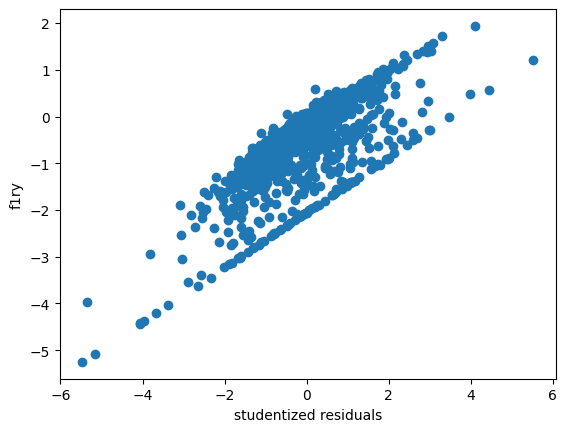

In [172]:
# Calcular los residuos studentizados
studentized_residuals = model.get_influence().resid_studentized_internal

# Definir un umbral para identificar outliers
threshold_studentized_residual = 2  # Ajusta este valor según sea necesario

outliers_studentized_residuals = np.where(np.abs(studentized_residuals) > threshold_studentized_residual)[0]

print("Observaciones con Residuos Studentizados Altos:")
print(outliers_studentized_residuals)

plt.scatter(x = studentized_residuals, y = y)
plt.xlabel("studentized residuals")
plt.ylabel('f1ry')
plt.show()


EN LA IDENTIFICACIÓN DE OUTLIERS, UTILIZAMOS LOS RESIDUOS STUDENTIZADOS COMO UNA MEDIDA ESTANDARIZADA QUE EVALÚA LA MAGNITUD DE LOS ERRORES DE PREDICCIÓN EN RELACIÓN CON SU VARIABILIDAD. LOS STUDENTIZED RESIDUALS SE CALCULAN DIVIDIENDO CADA RESIDUO POR SU ERROR ESTÁNDAR, PERMITIÉNDONOS EXPRESAR LA SIGNIFICANCIA DE LOS ERRORES EN TÉRMINOS DE DESVIACIONES ESTÁNDAR. EN ESTE CONTEXTO, HE ESTABLECIDO UN UMBRAL BASADO EN LA REGLA EMPÍRICA DE 

2 DESVIACIONES ESTÁNDAR. CUALQUIER RESIDUO STUDENTIZADO CUYO VALOR ABSOLUTO EXCEDA ESTE UMBRAL SE CONSIDERA ATÍPICO. ESTA ELECCIÓN PROPORCIONA UNA MEDIDA ROBUSTA PARA IDENTIFICAR OBSERVACIONES CUYOS COMPORTAMIENTOS DIFIEREN SUSTANCIALMENTE DEL PATRÓN GENERAL DEL MODELO, PERMITIÉNDONOS DESTACAR PUNTOS DE DATOS QUE PODRÍAN TENER UN IMPACTO DESPROPORCIONADO EN LOS RESULTADOS Y JUSTIFICANDO SU CONSIDERACIÓN COMO OUTLIERS.

### - Identify possible outliers using Cook’s distance. EXPLAIN your criteria to identify outliers with Cook’s distance and how they work.

0.003676470588235294
Observaciones con Cook’s Distance Altos:
[  22   31   32   41   50   58   67   84   85  111  131  155  181  184
  196  203  210  212  234  238  270  287  293  299  317  320  418  423
  424  459  462  489  516  517  633  636  653  684  697  771  896  900
  924  925  929  943  958  987 1007 1016 1045 1050 1104 1106 1127 1144
 1153 1187 1233 1244 1246 1253 1297 1304 1320 1325 1327 1352 1391]


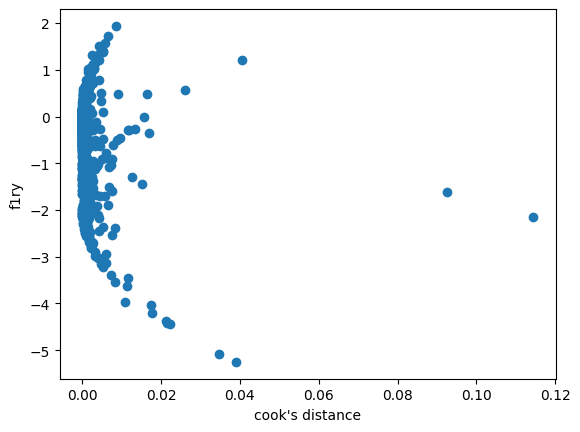

In [174]:
diagnostics = model.get_influence().summary_frame()


# Calcular Cook’s Distance
cook_distance = model.get_influence().cooks_distance[0]

# Definir un umbral para identificar outliers
threshold_cook_distance = 4 / len(X)  # Ajusta este valor según sea necesario

outliers_cook_distance = np.where(cook_distance > threshold_cook_distance)[0]


print(threshold_cook_distance)
print("Observaciones con Cook’s Distance Altos:")
print(outliers_cook_distance)

plt.scatter(x = cook_distance, y = y)
plt.xlabel("cook's distance")
plt.ylabel('f1ry')
plt.show()


AL ANALIZAR LOS RESULTADOS DE COOK'S DISTANCE, SE OBSERVAN VARIAS OBSERVACIONES CON DISTANCIAS DE COOK ELEVADAS, INDICANDO UNA INFLUENCIA SIGNIFICATIVA EN EL MODELO. LAS OBSERVACIONES CON COOK'S DISTANCE SUPERIOR AL UMBRAL ESTABLECIDO (4 DIVIDIDO POR EL NÚMERO TOTAL DE OBSERVACIONES) SE IDENTIFICAN COMO OUTLIERS POTENCIALES. ESTAS OBSERVACIONES (LISTADAS COMO [22, 31, 32, ...]) DEBEN SER EXAMINADAS DETENIDAMENTE, YA QUE SU ELIMINACIÓN PODRÍA TENER UN IMPACTO SIGNIFICATIVO EN LAS ESTIMACIONES DEL MODELO. 

EL UMBRAL DE COOK'S DISTANCE SE ESTABLECE EN 4 DIVIDIDO POR EL NÚMERO TOTAL DE OBSERVACIONES. ESTA ELECCIÓN DEL UMBRAL ESTÁ FUNDAMENTADA EN EL HECHO DE QUE COOK'S DISTANCE SIGUE APROXIMADAMENTE UNA DISTRIBUCIÓN CHI-CUADRADO CON K GRADOS DE LIBERTAD, DONDE K ES EL NÚMERO DE PARÁMETROS EN EL MODELO. EL UMBRAL DE 4 DIVIDIDO POR EL NÚMERO TOTAL DE OBSERVACIONES ES UN CRITERIO COMÚNMENTE UTILIZADO Y PROPORCIONA UNA REFERENCIA APROPIADA PARA DETECTAR OUTLIERS.

EL UMBRAL DE 4 DIVIDIDO POR EL NÚMERO TOTAL DE OBSERVACIONES SE ADOPTA COMO UNA HEURÍSTICA ACEPTADA PARA IDENTIFICAR OBSERVACIONES CON UNA INFLUENCIA SIGNIFICATIVA EN MODELOS DE REGRESIÓN.

### - Using studentized residuals and Cook’s distance identify possible influential observations. EXPLAIN your criteria.

In [187]:
inf_obs = model.get_influence().summary_frame()


outliers = np.where(np.abs(inf_obs.student_resid) > 2 | (inf_obs.cooks_d > 0.0036))[0].tolist()
inf_obs = inf_obs.drop(inf_obs.index[outliers])


inf_obs


,,dfb_const,dfb_epsp,dfb_ato,dfb_oepsp,dfb_size_2,dfb_size_3,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
firm,qdate,,,,,,,,,,,,
A,2022Q4,0.00,0.00,-0.00,-0.00,0.00,0.01,0.00,0.17,0.00,0.01,0.17,0.01
AAOI,2022Q4,0.01,-0.02,0.01,0.01,-0.01,-0.01,0.00,0.92,0.00,0.04,0.92,0.04
AAPL,2022Q3,0.00,-0.00,-0.01,0.00,-0.00,-0.01,0.00,-0.43,0.00,-0.02,-0.43,-0.02
ABBV,2022Q4,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.08,0.00,0.00,0.08,0.00
ABEO,2022Q4,-0.01,-0.00,0.00,0.00,0.00,0.00,0.00,-0.16,0.00,-0.01,-0.16,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZBRA,2022Q4,0.00,-0.00,-0.00,0.00,-0.00,-0.01,0.00,-0.36,0.00,-0.02,-0.36,-0.02
ZTS,2022Q4,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.12,0.00,-0.01,-0.12,-0.01
ZVIA,2022Q4,0.00,0.01,0.02,-0.00,-0.01,-0.01,0.00,0.39,0.01,0.03,0.39,0.03



PARA IDENTIFICAR OBSERVACIONES INFLUYENTES, UTILIZASTE DOS ENFOQUES: RESIDUOS ESTANDARIZADOS Y LA DISTANCIA DE COOK. LAS OBSERVACIONES QUE SE IDENTIFICARON COMO INFLUYENTES SON AQUELLAS QUE APARECEN EN AMBOS CONJUNTOS DE OUTLIERS IDENTIFICADOS POR RESIDUOS ESTANDARIZADOS Y LA DISTANCIA DE COOK. ESTE ENFOQUE DE "CONJUNCIÓN" BUSCA UN CONSENSO ENTRE AMBOS CRITERIOS, LO QUE IMPLICA QUE LAS OBSERVACIONES QUE APARECEN EN AMBOS CONJUNTOS SON IDENTIFICADAS COMO POTENCIALMENTE INFLUYENTES.

AL COMBINAR AMBOS CONJUNTOS, ESTAMOS BUSCANDO OBSERVACIONES QUE NO SOLO TENGAN RESIDUOS ESTANDARIZADOS SIGNIFICATIVOS, SINO TAMBIÉN UNA GRAN INFLUENCIA EN EL MODELO SEGÚN LA DISTANCIA DE COOK. ESTO AÑADE UN NIVEL ADICIONAL DE SEGURIDAD AL IDENTIFICAR OBSERVACIONES QUE PODRÍAN TENER UN IMPACTO SUSTANCIAL EN LOS RESULTADOS DEL MODELO.

### - List the influential observations and decide whether to drop them or keep some of them

[1, 3, 9, 13, 15, 16, 17, 20, 27, 28, 31, 32, 41, 44, 49, 50, 53, 56, 58, 67, 70, 71, 78, 82, 83, 84, 85, 92, 93, 98, 102, 108, 110, 111, 117, 118, 119, 123, 126, 128, 131, 132, 136, 144, 147, 155, 158, 172, 173, 175, 180, 181, 184, 192, 193, 196, 203, 204, 209, 210, 212, 217, 226, 233, 234, 236, 238, 239, 242, 243, 244, 246, 249, 250, 252, 254, 259, 261, 263, 264, 265, 269, 270, 287, 293, 294, 299, 301, 302, 316, 317, 320, 338, 340, 346, 348, 349, 353, 355, 357, 371, 374, 377, 383, 397, 401, 402, 404, 411, 413, 415, 418, 420, 422, 423, 424, 425, 430, 431, 438, 456, 459, 461, 462, 469, 474, 476, 486, 488, 503, 506, 507, 508, 510, 516, 517, 518, 519, 527, 529, 533, 534, 548, 552, 559, 561, 566, 576, 580, 582, 591, 596, 597, 598, 606, 608, 610, 611, 628, 630, 631, 632, 633, 634, 636, 637, 639, 642, 645, 646, 650, 652, 653, 660, 667, 672, 674, 677, 678, 682, 684, 697, 706, 717, 721, 730, 739, 744, 746, 749, 760, 771, 774, 790, 796, 808, 812, 815, 817, 821, 831, 834, 843, 862, 870, 872, 88

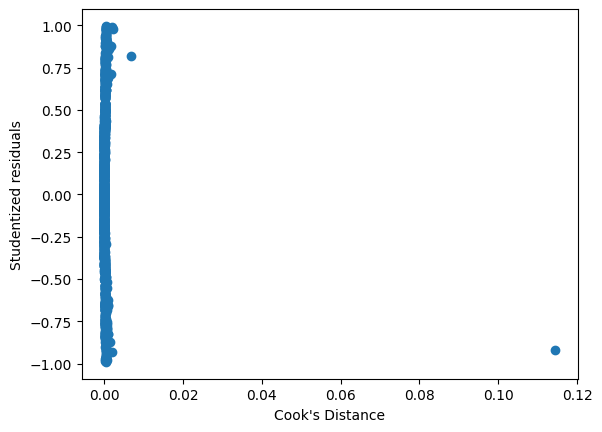

In [188]:
print(outliers)

plt.scatter(x = diagnostics.cooks_d, y = diagnostics.student_resid)
plt.xlabel("Cook's Distance")
plt.ylabel('Studentized residuals')
plt.show()


### Re-run the multiple regression model without the influential observation

In [189]:
# Crear un nuevo conjunto de datos sin las observaciones influyentes

RD_final = RD_2022[['f1ry','epsp', 'ato', 'oepsp', 'size_2', 'size_3']].copy()


x2 = RD_final[['epsp', 'ato', 'oepsp', 'size_2', 'size_3']]

# Aqui ya hacemos el drop de los influential observations encontrados anteriormente

x2 = x2.drop(x2.index[outliers])


y2 = RD_final[['f1ry']]
 
y2 = y2.drop(y2.index[outliers])



In [190]:
import statsmodels.api as sm

X = sm.add_constant(x2)

# Ajustar el modelo de regresión con términos de interacción
model_interactions = sm.OLS(y2, X, missing='drop').fit()

# Mostrar resumen del modelo con términos de interacción
print(model_interactions.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     551.8
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          1.20e-294
Time:                        21:55:28   Log-Likelihood:                -157.88
No. Observations:                1088   AIC:                             327.8
Df Residuals:                    1082   BIC:                             357.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2306      0.022    -10.311      0.0

Podemos notar que existe una mejora significativa en el modelo ya que pasamos de tener una r cuadrada de 43.6% a tener una r cuadrada de 71.8%, esto nos permite ya tener una confianza mayor en las predicicones resultantes del modelo para los retornos trimestrales al año.

En cuanto a los coeficientes, si tuvimos varios cambios con respecto al primero modelo realizado ya que en ese modelo todos los valores eran significativos y tenian un p cercano a 0. Sin embargo aquí, tenemos dos variables que su p value mayor a 0.05 por mucho, el epsp y el ato. Además su t value absoluto es menor a 2 por mucho entonces no es nada significativo y no es tan confiable para rechazar la hipótesis nula.

En cuanto a las demas variables podemos notar que para las empresas medianas en promedio y en comparacion con las pequeñas la variable dependiente f1ry aumenta 0.0704 unidades mientras que en las grandes aumenta en 0.17 unidades. 

En cuanto al coeficiente del oepsp podemos decir que es muy significativamente diferente de 0 y tiene una relación positiva significativa debido a sus valores de t y p. 


En general fue una mejora en el modelo a comparación de las primeras implementaciones, alcanzando un valor no excelente pero bueno de 71% en el r cuadrada. 

